In [1]:
import astropy.units as u
from astropy.constants import au, R_sun
from astropy.stats import gaussian_fwhm_to_sigma
import math
import numpy as np
from astropy.constants import au, R_sun
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math

In [2]:
transunit = (180*3600/(974.634085*math.pi))**2 / 1000
transunit*19.8*(16*math.pi/(180*60))**2      #wavelength shift at the edge of solar disk 


0.019209871746847598

# 这个文件主要说明我得出了与 P46图3.6 相反的结果
我都用的aiapy

<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:30%;" />
alpha beta 方向都展示

## 我的结果 2048 outside of disk
$\lambda$ range: -0.1,0.25,35 

In [2]:
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/outside_disk.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

In [22]:
DN['DN_alpha'].shape

(61, 36)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

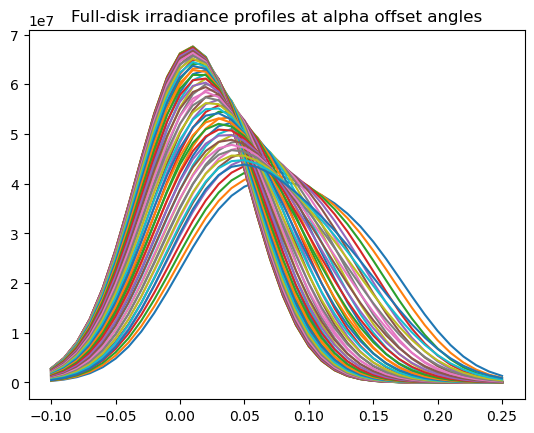

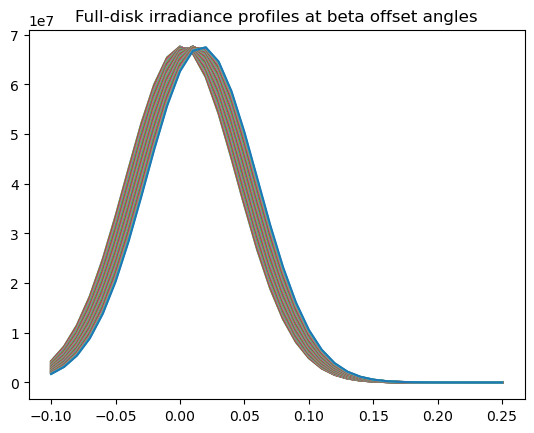

In [23]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He 谱线轮廓随入射偏角𝜷变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

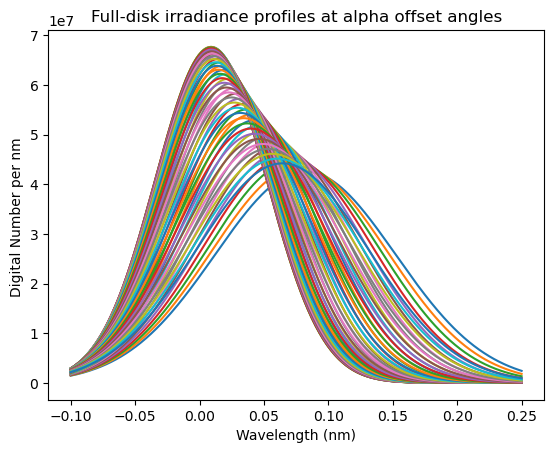

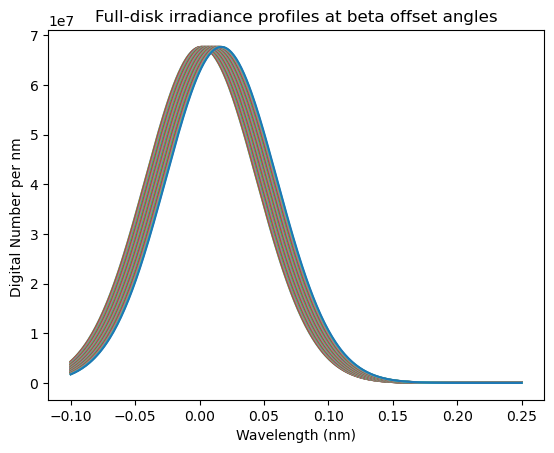

In [24]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

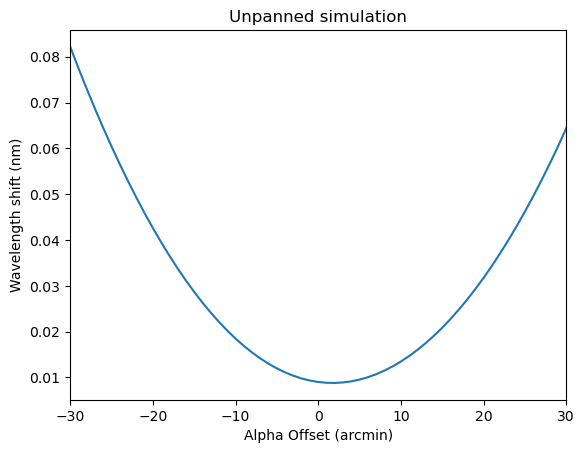

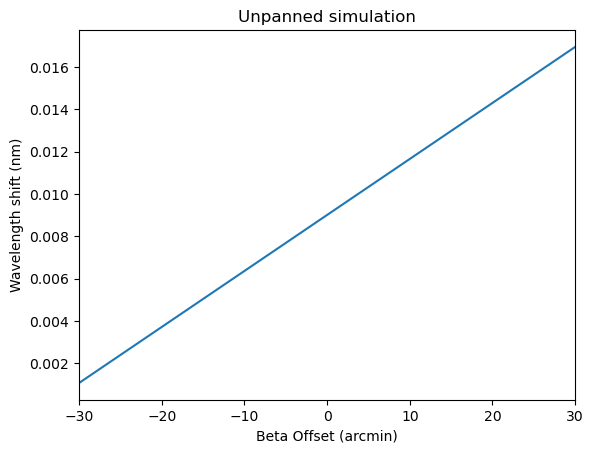

In [25]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

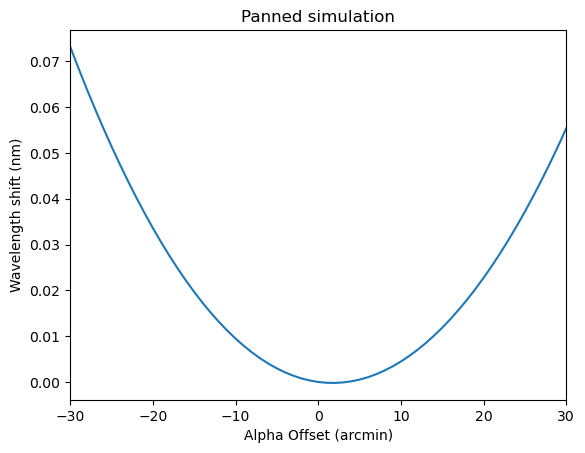

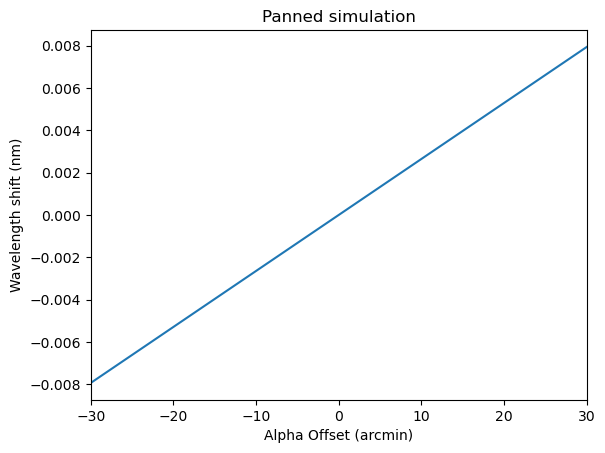

In [26]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [ ]:
#beta 方向与论文中符合的很好，就没有继续讨论了
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[0]

In [ ]:
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[-1]

In [ ]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

In [ ]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*(wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]))
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [ ]:
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2,c="orange")  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"],bbox_to_anchor=(0, 1))
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## 我的结果 2048 disk

In [35]:
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/disk.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

In [36]:
DN['DN_alpha'].shape

(61, 36)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

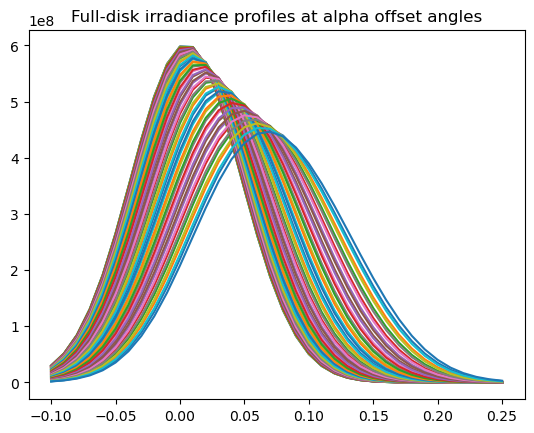

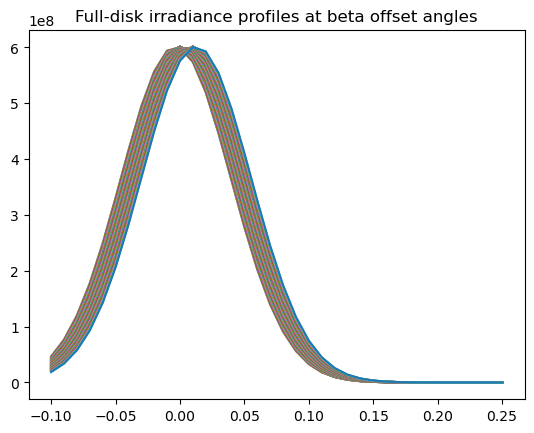

In [37]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He 谱线轮廓随入射偏角𝜷变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

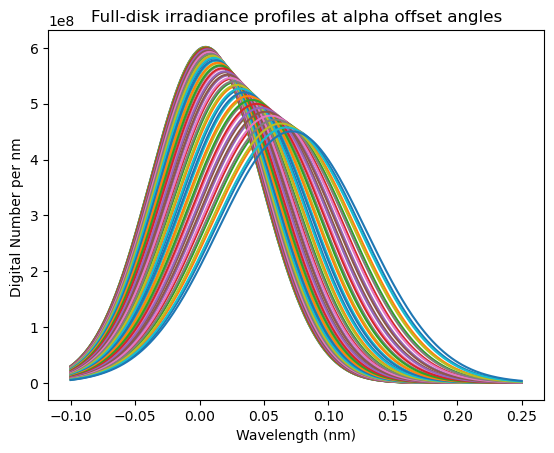

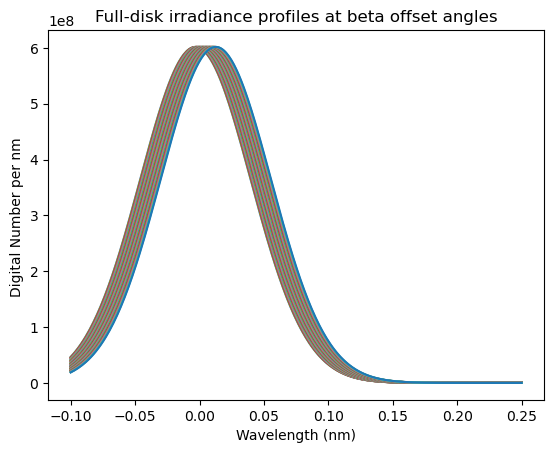

In [38]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

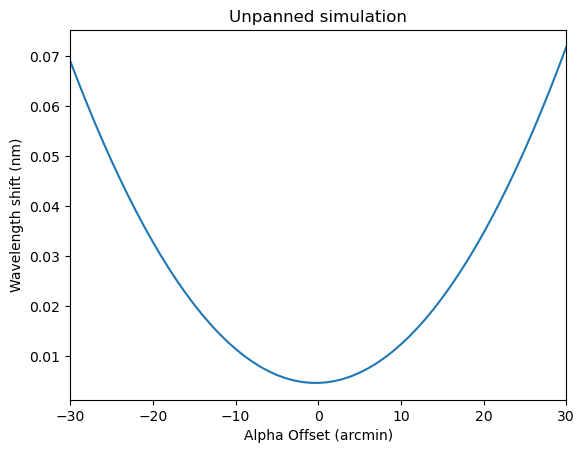

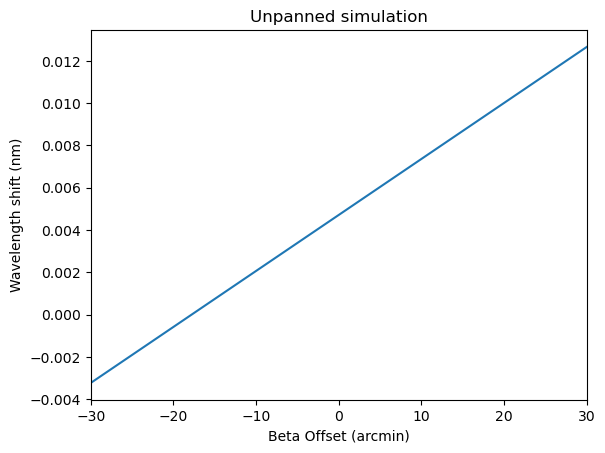

In [39]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

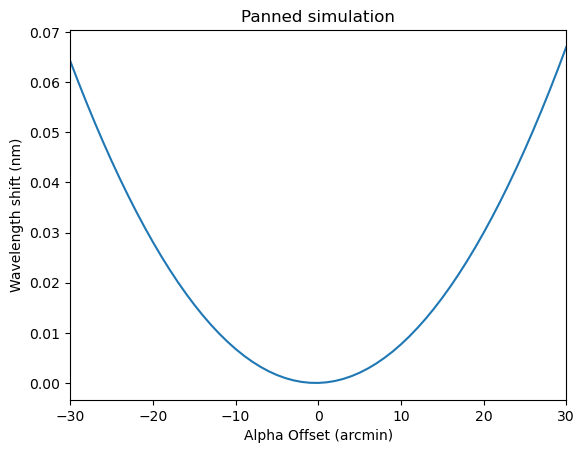

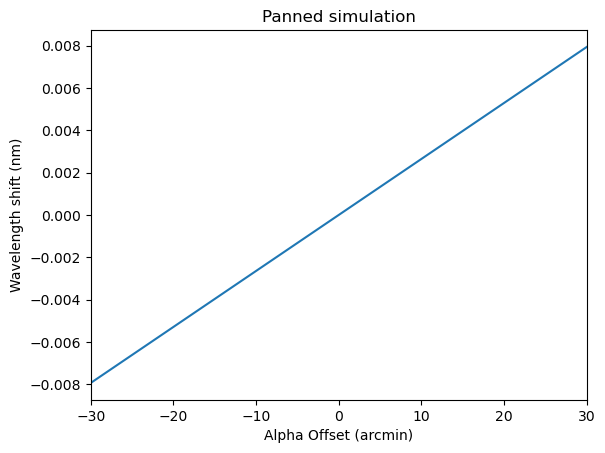

In [41]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [42]:
#beta 方向与论文中符合的很好，就没有继续讨论了
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[0]

0.06421675829244985

In [43]:
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[-1]

0.06705459112531932

(-30.0, 30.0)

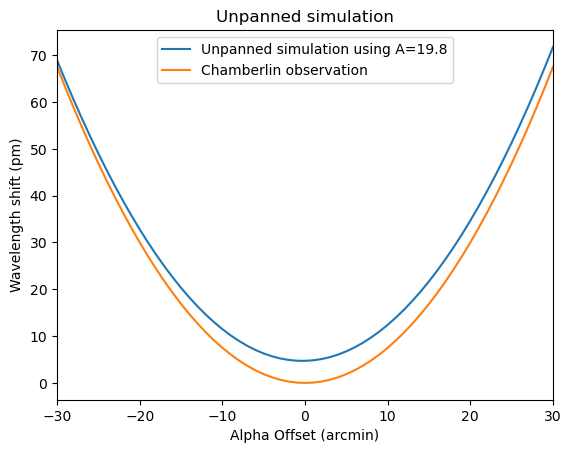

In [44]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

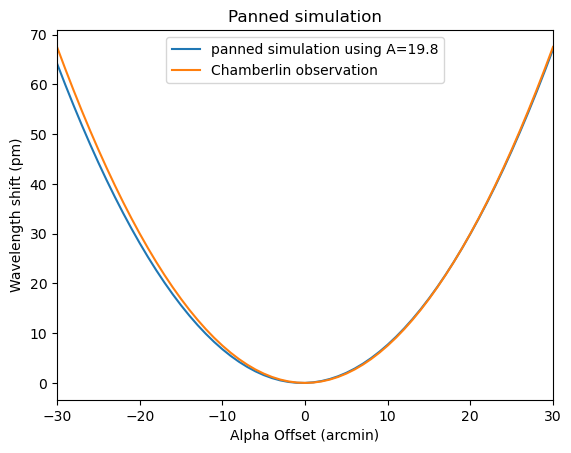

In [45]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*(wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]))
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

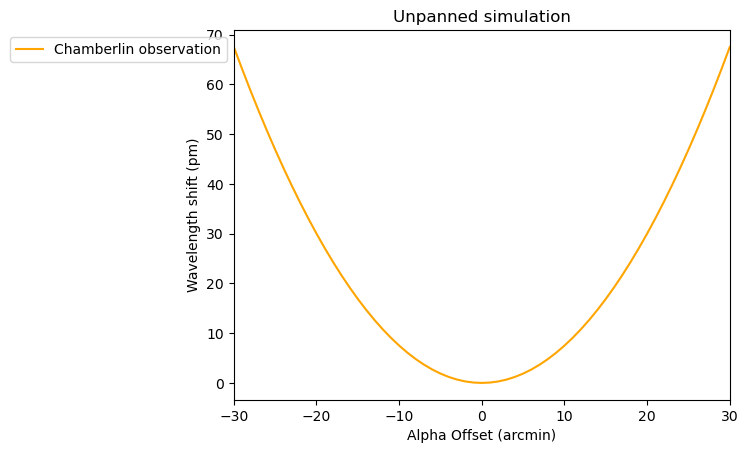

In [46]:
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2,c="orange")  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"],bbox_to_anchor=(0, 1))
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## 我的结果 2048 IDL
用IDL的问题就是我没用IDL的 像素到角度的转换

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_2048/DN_2048_IDL.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

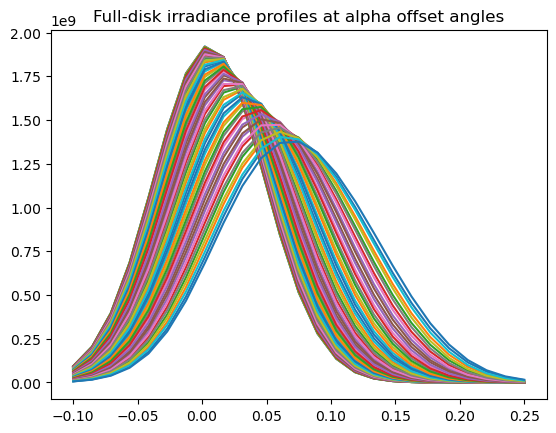

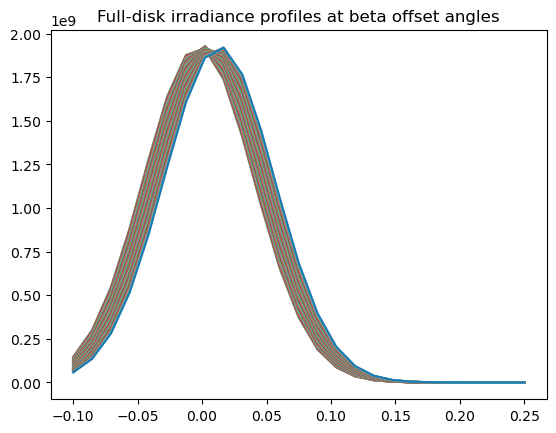

In [17]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i], label='linear')
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label='linear')
# ax.set_title("He 谱线轮廓随入射偏角𝜷变化的模拟结果")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

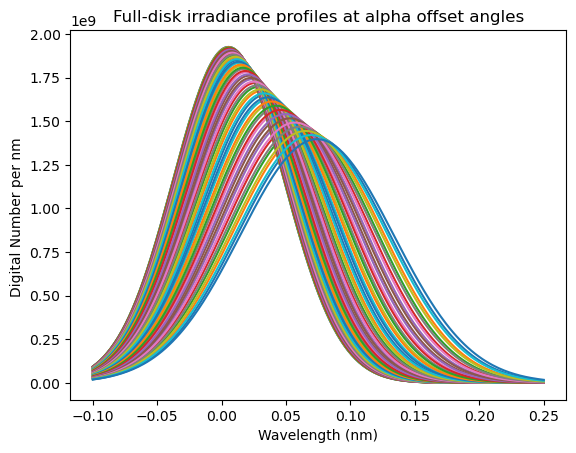

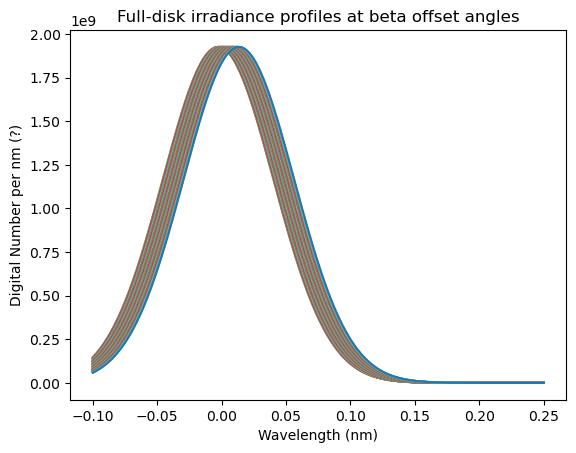

In [18]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

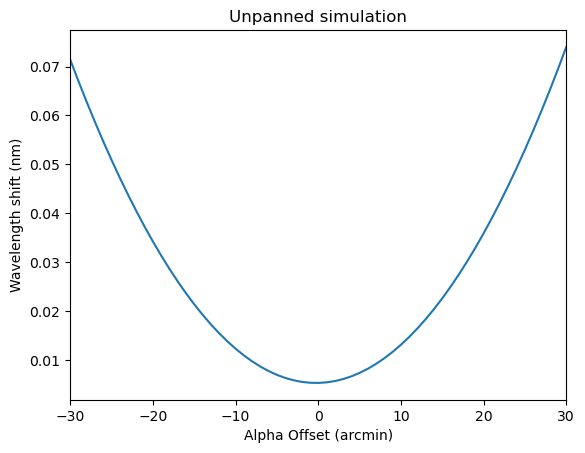

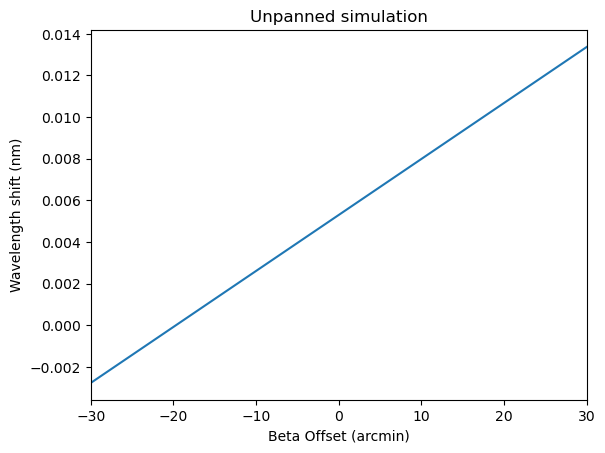

In [19]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

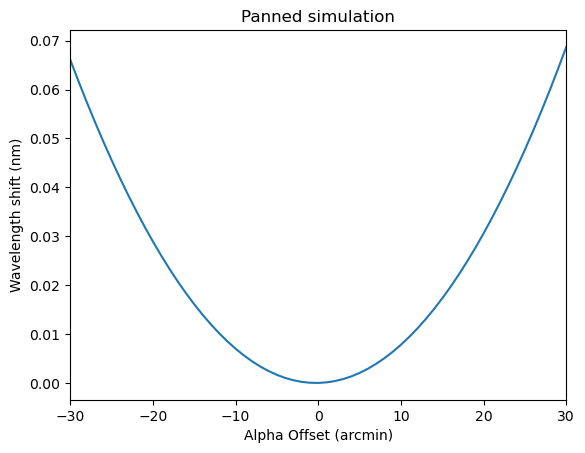

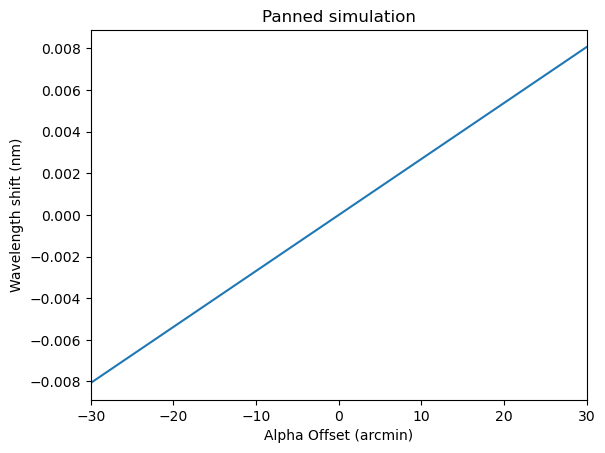

In [20]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

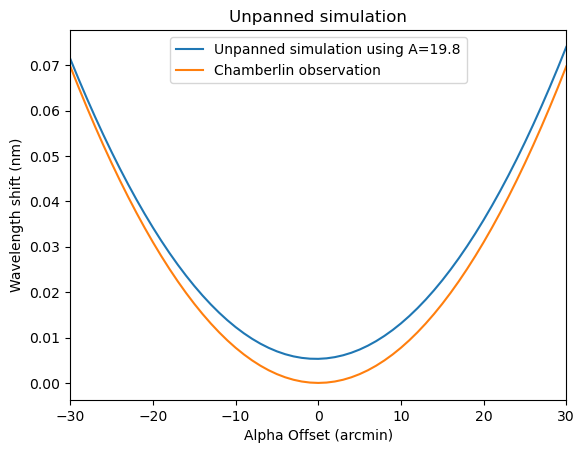

In [21]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## 我的结果 4096 aiapy normalized

In [27]:
from calculating_DN_2048 import wavelength_point_num, wavelength_list
from calculating_DN_2048 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_2048 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/_4096/DN_4096_normalized.npz")

# Initialize
# Cruciformscan in alpha direction
offaxis_angle_x_min_alpha=offaxis_angle_x_alpha*180*60/math.pi

# Cruciformscan in beta direction
offaxis_angle_y_min_beta=offaxis_angle_y_beta*180*60/math.pi

# Fit data in DN    .npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=1E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)
    
wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E9, mean=0.05, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

In [104]:
plt.cm?

Type:        module
String form: <module 'matplotlib.cm' from 'C:\\Users\\asus-pc\\anaconda3\\envs\\Py_Begin\\lib\\site-packages\\matplotlib\\cm.py'>
File:        c:\users\asus-pc\anaconda3\envs\py_begin\lib\site-packages\matplotlib\cm.py
Docstring:  
Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

.. seealso::

  :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.

  :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
  make colormaps.

  :doc:`/tutorials/colors/colormaps` an in-depth discussion of
  choosing colormaps.

  :doc:`/tutorials/colors/colormapnorms` for more details about data
  normalization.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


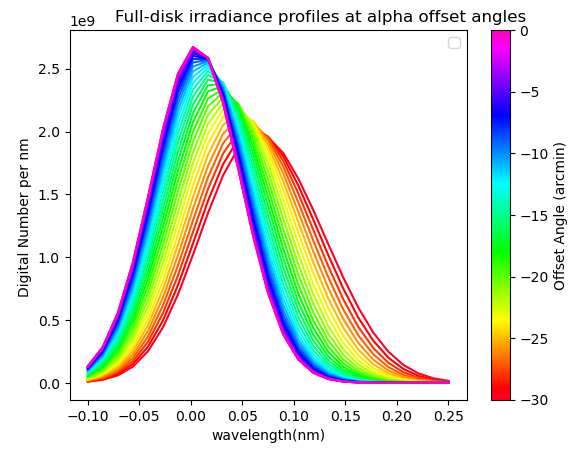

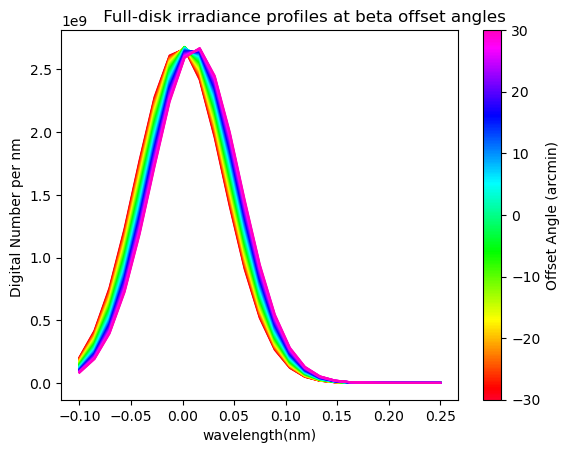

In [142]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
cmap = plt.cm.gist_rainbow

norm = plt.Normalize(vmin=-30, vmax=0)
# for i in range(angle_point_num_alpha):
for i in range(31):
    ax.plot(wavelength_list, DN['DN_alpha'][i],color=cmap(norm(offaxis_angle_x_min_alpha[i])) )
            # label=str(offaxis_angle_x_min_alpha[i]))
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.set_title("                    Full-disk irradiance profiles at alpha offset angles")
ax.set_ylabel("Digital Number per nm ")
ax.set_xlabel("wavelength(nm)")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.colorbar(sm,label='Offset Angle (arcmin)')

ax.legend()

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
cmap = plt.cm.gist_rainbow

norm = plt.Normalize(vmin=-30, vmax=30)
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], color=cmap(norm(offaxis_angle_y_min_beta[j])) )
# ax.set_title("He 谱线轮廓随入射偏角𝜷变化的模拟结果")
ax.set_ylabel("Digital Number per nm ")
ax.set_title("                 Full-disk irradiance profiles at beta offset angles")
ax.set_xlabel("wavelength(nm)")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,label='Offset Angle (arcmin)')


In [122]:
DN['DN_alpha'].shape


(61, 25)

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

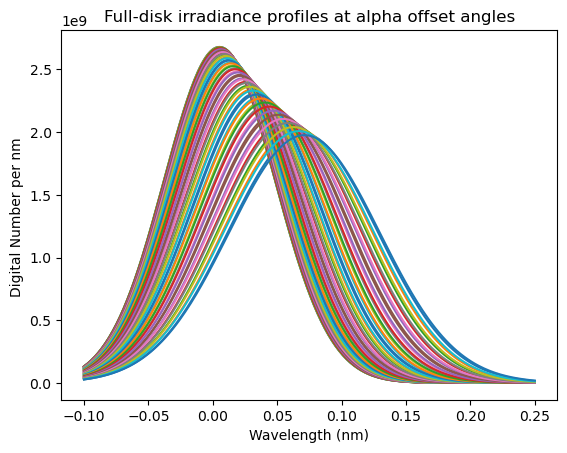

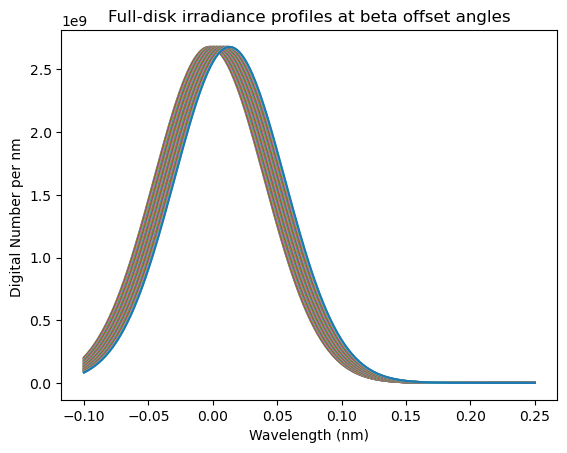

In [123]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-0.1, 0.25, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list))

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm ")
ax.set_title("Full-disk irradiance profiles at beta offset angles")

Text(0.5, 1.0, 'Unpanned simulation')

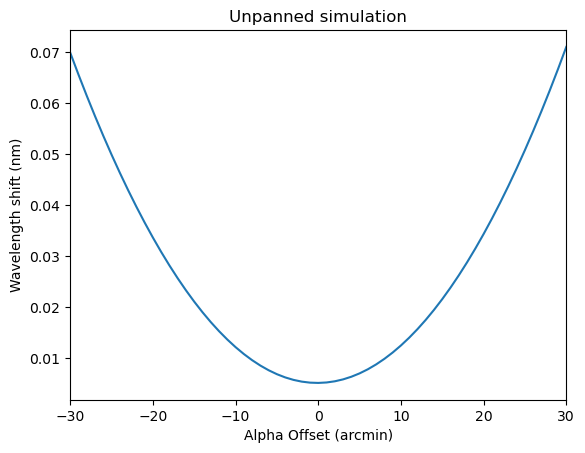

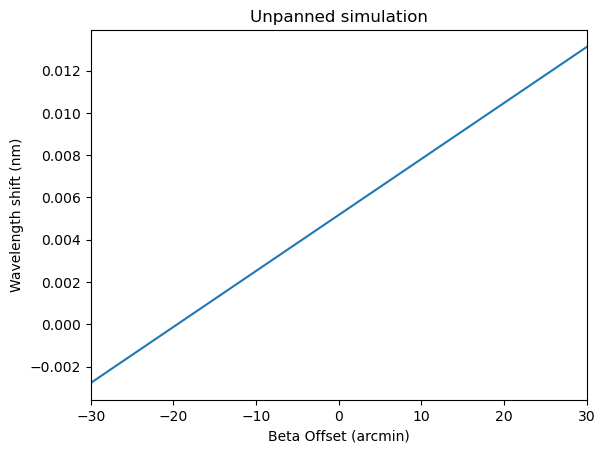

In [124]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha)
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta)
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlim(-30,30)
ax.set_title("Unpanned simulation")

(-30.0, 30.0)

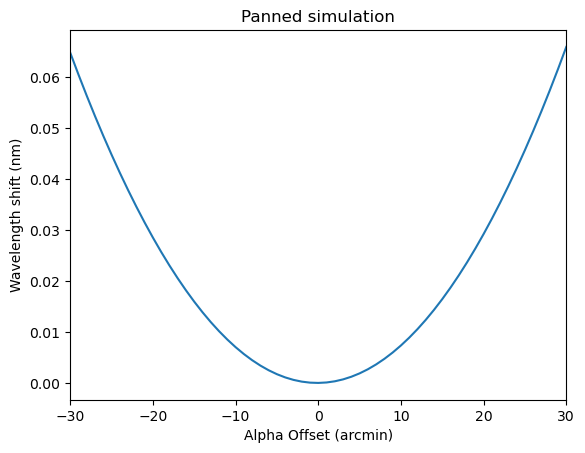

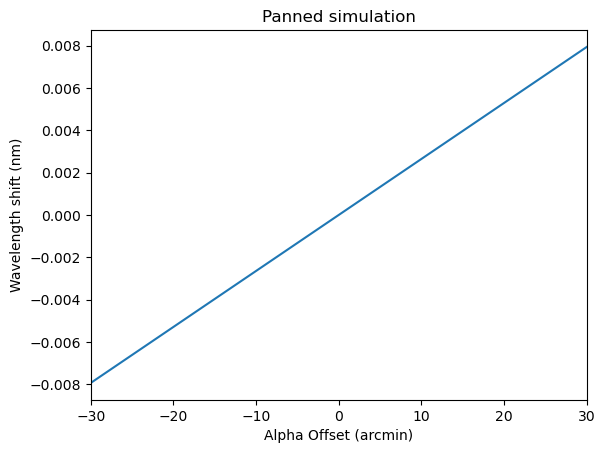

In [125]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]) # 我采用直接向下平移
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [126]:
#beta 方向与论文中符合的很好，就没有继续讨论了
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[0]

0.06475396749586962

In [127]:
(wavelength_shift_alpha -wavelength_shift_alpha[int(angle_point_num_alpha/2)])[-1]

0.0659161468316316

(-30.0, 30.0)

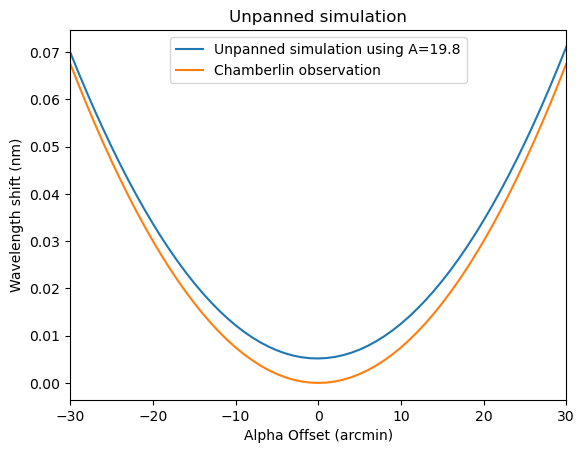

In [128]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha )
ax.plot(offaxis_angle_x_min_alpha,19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Unpanned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

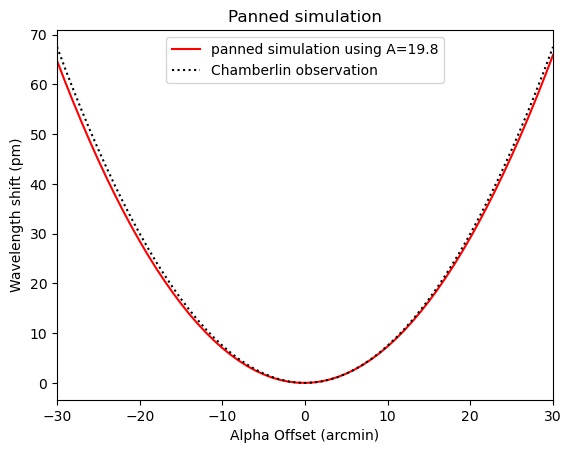

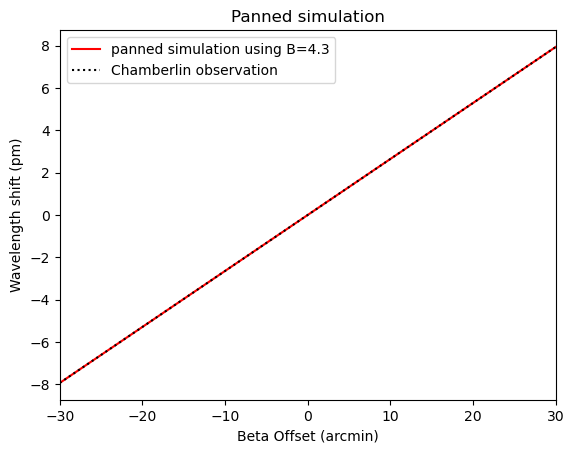

In [146]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, 1e3*(wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)]), color='red', linestyle='solid')
ax.plot(offaxis_angle_x_min_alpha,1e3*19.8*transunit*offaxis_angle_x_alpha**2,
        color='black', linestyle='dotted')  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
# ax.set_yticks(ax.get_ytick?s())


ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_min_beta, 1e3*(wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)]), color='red', linestyle='solid')
ax.plot(offaxis_angle_y_min_beta,4.3*(180*3600/(974.634085*math.pi))*offaxis_angle_y_beta,
        color='black', linestyle='dotted')  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using B=4.3","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (pm)')
ax.set_xlabel("Beta Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

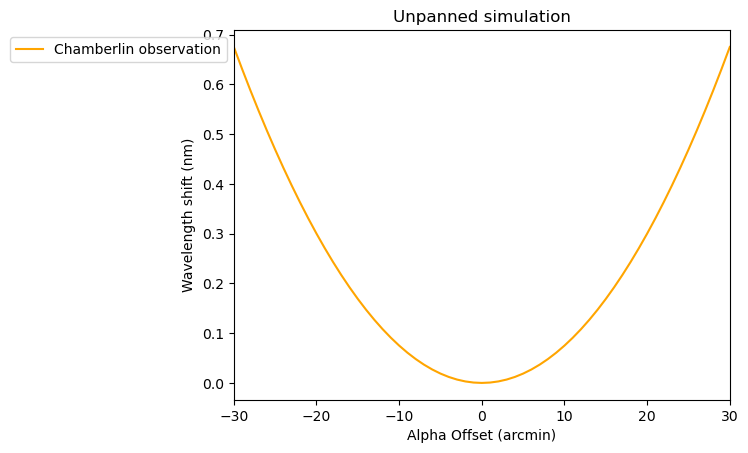

In [43]:
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,10*19.8*transunit*offaxis_angle_x_alpha**2,c="orange")  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"],bbox_to_anchor=(0, 1))
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Unpanned simulation")
ax.set_xlim(-30,30)

## 论文中的结果  对比

(-30.0, 30.0)

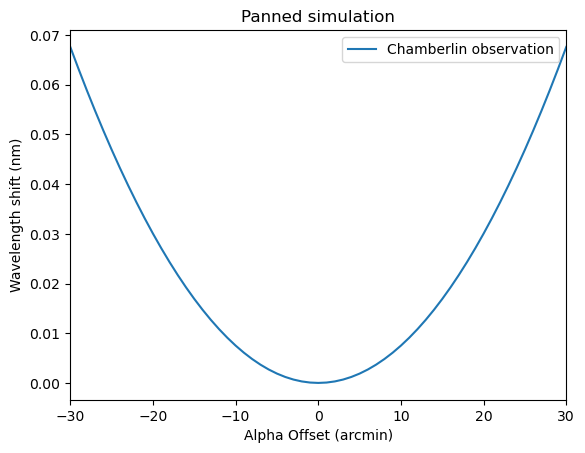

In [33]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,19.2*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

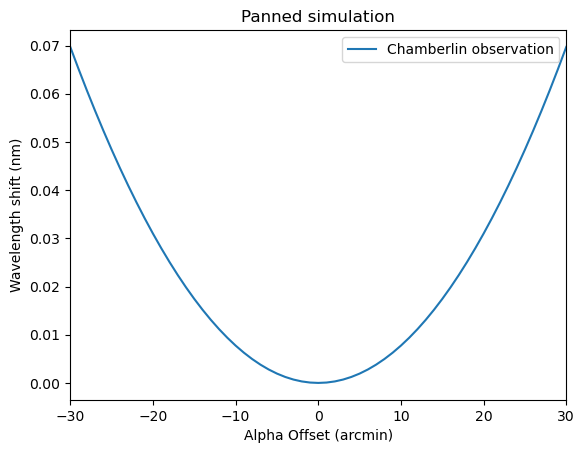

In [34]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha,19.8*transunit*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

(-30.0, 30.0)

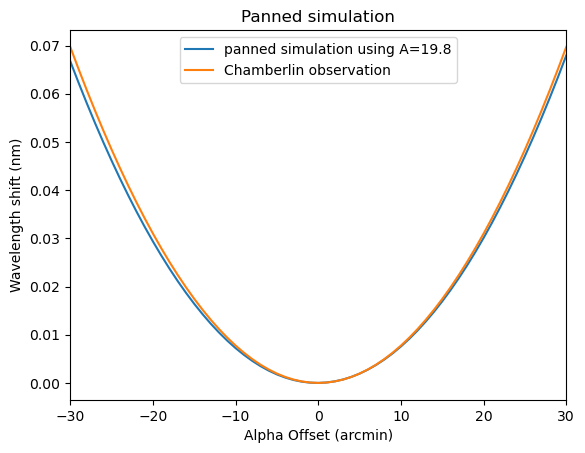

In [35]:
# central wavelength shift 
# my panned simulation vs. Chamberlin(2016) observation

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_min_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.plot(offaxis_angle_x_min_alpha,915.53*offaxis_angle_x_alpha**2)  #这个换算详见unit_conversion.py
ax.legend(["panned simulation using A=19.8","Chamberlin observation"])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Alpha Offset (arcmin)")
ax.set_title("Panned simulation")
ax.set_xlim(-30,30)

In [36]:
19.8*transunit*offaxis_angle_x_alpha[0]**2

0.0697215047309075

我的结果上图与下图博士论文P46结果明显不同：

上图：我的蓝线模拟在橙线下方

下图：红色模拟在观测黑虚线上方

P46 图 3.6 He II 中心波长随入射偏角𝜶和𝜷变化的模拟结果和观测结果

<img src="./visualization.assets/image-20230311153746936.png" alt="image-20230311153746936" style="zoom:70%;" />



我对论文P50对于“为什么A越迭代越大”的解释有疑问:

<img src="./visualization.assets/image-20230311155201746.png" alt="image-20230311155201746" style="zoom:33%;" />

而对于论文P50，对于“为什么A越迭代越大”的解释，这两点我理解了，我也得到了相符的结论：

1. $\Delta \lambda_0 < \bar{\Delta \lambda}$ 的分析正确

2. 所以未向下平移的蓝线在橙色线上方

    <img src="./visualization.assets/image-20230312154237323.png" alt="image-20230312154237323" style="zoom:50%;" />

3. 但是我不理解为什么上述理论说明:将蓝色线向下平移后（P46上半页）,蓝色线仍应该在橙线上方。


   而我的结果就在下方了。。
    <img src="./visualization.assets/image-20230312154314802.png" alt="image-20230312154314802" style="zoom:50%;" />


In [2]:
def f():
    for i in range(3):
        return i
f()

0

In [3]:
a=np.array([0,1])

In [4]:
a[0]=[0,1]

ValueError: setting an array element with a sequence.